# Sprint7
## K-meansスクラッチ

In [152]:
import numpy as np
import pandas as pd
from numpy.random import *
import random
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')

### クラスタリングのための人工データセット

In [11]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

## データセット確認

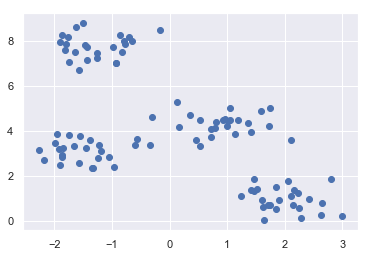

In [12]:
#データの可視化
plt.scatter(X[:,0],X[:,1])
plt.show()

## ScratchKMeansクラス

## 【問題5】繰り返し

In [13]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centers=[]

    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        """
        #各init_nの最適なSSEの値を格納する配列作成
        self.SSE_n_init=np.zeros(self.n_init)
        #中心点を格納する３次元配列作成（※n_init＊中心点の座標で３次元）
        self.centers_3d=np.zeros((self.n_init,self.n_clusters,X.shape[1]),dtype=np.int)
        for i in range(self.n_init):
            #中心点の初期値定義
            self._init_centers(X)
            #iter分のSSEを格納する配列作成
            self.SSE_iter=[]
            
            for j in range(self.max_iter):
                #中心点の更新
                self._sprit_class(X)
                self._move_centers(X)
                self.SSE_iter.append(self._SSE())
                #jが１以上の場合はSSE比較をし変動がなければbreak（※エラー対処）
                if j>=1:
                    if self.SSE_iter[-2]==self.SSE_iter[-1]:
                        break
                        
            #n_initのSSE配列に学習後のSSEを格納
            self.SSE_n_init[i]=self.SSE_iter[-1]
            #３d配列に学習後の中心点の座標を格納（SSEが最小の時）
            self.centers_3d[i,:,:]=self.centers
            
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print("{}回目の中心点：{}".format(i,self.center))
        #学習後の中心点格納
        self.result=self.centers_3d[self.SSE_n_init.argmin(),:,:]
        

        

    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        distance=np.zeros((X.shape[0],self.n_clusters))
        for i in range(self.n_clusters):
            self.distance[:,i]=np.linalg.norm(X-self.result[i,:],axis=1)
        self.class_label=self.distance.argmin(axis=1)
        
        return self.class_label
    
    def _init_centers(self,X):
        """
        中心点初期値を計算
        """
        #最初の確率は均等
        pr=np.repeat(1/X.shape[0],X.shape[0])
        self.centers_index=np.random.choice(range(X.shape[0]),self.n_clusters,replace=False,p=pr)
        self.centers=X[self.centers_index]
        init_centers=X[self.centers_index]
        return init_centers
        
    def _SSE(self):
        sse=self.distance.min(axis=1).sum()
        return sse
    
    def _sprit_class(self,X):
        """
        クラスタへの割り当て
        """
        self.distance=np.zeros((X.shape[0],self.n_clusters))
        for i in range(self.n_clusters):
            self.distance[:,i]=np.linalg.norm(X-self.centers[i,:],axis=1)
        self.class_label=self.distance.argmin(axis=1)

    def _move_centers(self,X):
        """
        中心点の移動
        """
        next_p=np.zeros((self.n_clusters,X.shape[1]))
        for i in range(self.n_clusters):
            next_p[i,:]=X[self.class_label==i,:].mean(axis=0)
        self.centers=next_p
        
    

In [13]:
class ScratchKMeans_():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centers=[]

    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        """
        #各init_nの最適なSSEの値を格納する配列作成
        self.SSE_n_init=np.zeros(self.n_init)
        #中心点を格納する３次元配列作成（※n_init＊中心点の座標で３次元）
        self.centers_3d=np.zeros((self.n_init,self.n_clusters,X.shape[1]),dtype=np.int)
        for i in range(self.n_init):
            #中心点の初期値定義
            self._init_centers(X)
            #iter分のSSEを格納する配列作成
            self.SSE_iter=[]
            
            for j in range(self.max_iter):
                #中心点の更新
                self._sprit_class(X)
                self._move_centers(X)
                self.SSE_iter.append(self._SSE())
                #jが１以上の場合はSSE比較をし変動がなければbreak（※エラー対処）
                if j>=1:
                    if self.SSE_iter[-2]==self.SSE_iter[-1]:
                        break
                        
            #n_initのSSE配列に学習後のSSEを格納
            self.SSE_n_init[i]=self.SSE_iter[-1]
            #３d配列に学習後の中心点の座標を格納（SSEが最小の時）
            self.centers_3d[i,:,:]=self.centers
            
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print("{}回目の中心点：{}".format(i,self.center))
        #学習後の中心点格納
        self.result=self.centers_3d[self.SSE_n_init.argmin(),:,:]
        

        

    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        distance=np.zeros((X.shape[0],self.n_clusters))
        for i in range(self.n_clusters):
            self.distance[:,i]=np.linalg.norm(X-self.result[i,:],axis=1)
        self.class_label=self.distance.argmin(axis=1)
        
        return self.class_label
    
    def _init_centers(self,X):
        """
        中心点初期値を計算
        """
        #最初の確率は均等
        pr=np.repeat(1/X.shape[0],X.shape[0])
        self.centers_index=np.random.choice(range(X.shape[0]),self.n_clusters,replace=False,p=pr)
        self.centers=X[self.centers_index]
        init_centers=X[self.centers_index]
        return init_centers
        
    def _SSE(self):
        sse=self.distance.min(axis=1).sum()
        return sse
    
    def _sprit_class(self,X):
        """
        クラスタへの割り当て
        """
        self.distance=np.zeros((X.shape[0],self.n_clusters))
        for i in range(self.n_clusters):
            self.distance[:,i]=np.linalg.norm(X-self.centers[i,:],axis=1)
        self.class_label=self.distance.argmin(axis=1)

    def _move_centers(self,X):
        """
        中心点の移動
        """
        next_p=np.zeros((self.n_clusters,X.shape[1]))
        for i in range(self.n_clusters):
            next_p[i,:]=X[self.class_label==i,:].mean(axis=0)
        self.centers=next_p
        
    

In [14]:
model=ScratchKMeans(4,5,10,0)

In [15]:
model.fit(X)

In [16]:
y=model.predict(X)

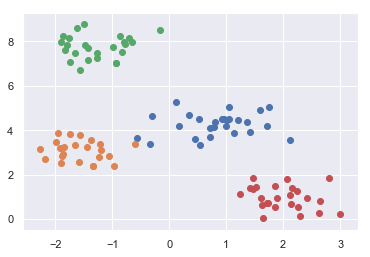

In [17]:
for i in range(4):
    plt.scatter(X[y==i,0],X[y==i,1])

## 【問題1】中心点の初期値を決める

In [18]:
n_class=4

In [19]:
"""
ランダムに中心点の初期座標を生成
"""
def _init_centers(n_class=4):
    centers=np.random.choice(range(X.shape[0]),n_class,replace=False)
    return centers

#動作確認
centers=_init_centers()

## 【問題2】SSEを求める関数の作成

In [20]:
def _SSE(distance):
    sse=distance.min(axis=1).sum()
    return sse

## 【問題3】クラスタへの割り当て

In [21]:
distance=np.zeros((X.shape[0],n_class))
for i in range(n_class):
    distance[:,i]=np.linalg.norm(X-X[centers[i]],axis=1)
dis_min=distance.argmin(axis=1)

## 【問題4】中心点の移動

In [22]:
next_p=np.zeros((n_class,X.shape[1]))
for i in range(n_class):
    next_p[i]=X[dis_min==i,:].mean(axis=0)

## 【問題6】異なる初期値で計算

In [23]:
model2=ScratchKMeans(4,10,10,0)

In [24]:
model2.fit(X)

In [25]:
y2=model2.predict(X)

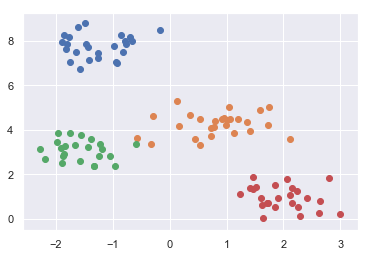

In [26]:
for i in range(4):
    plt.scatter(X[y2==i,0],X[y2==i,1])

## 【問題7】推定

In [27]:
y

array([0, 2, 0, 0, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 3, 3, 0, 1, 3, 0, 2,
       1, 3, 0, 1, 0, 0, 3, 3, 3, 2, 3, 3, 1, 0, 2, 3, 2, 1, 0, 1, 2, 1,
       1, 2, 3, 1, 0, 0, 0, 3, 1, 1, 1, 2, 2, 3, 3, 2, 2, 3, 3, 0, 3, 2,
       1, 1, 3, 0, 2, 3, 0, 2, 0, 0, 1, 1, 3, 3, 3, 2, 1, 0, 3, 1, 3, 3,
       0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 2, 0])

## 【問題8】エルボー法の実装

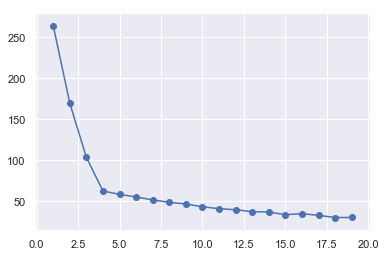

In [29]:
SSE=[]
for i in range(1,20):
    el=ScratchKMeans(i,5,10,0)
    el.fit(X)
    SSE.append(el.SSE_n_init.min())
plt.plot(range(1,20),SSE)
plt.scatter(range(1,20),SSE)
plt.show()

# クラスタ分析

In [30]:
data=pd.read_csv("/Users/wakaichiaki/Downloads/Wholesale customers data.csv")

In [31]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [32]:
#8→６次元へ
data_drop=data.drop(columns=["Channel","Region"])
data_drop.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [116]:
#データ対数化
data_log=np.log(data_drop)

In [131]:
#データ標準化
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_std=sc.fit_transform(data_log)

In [132]:
#次元削減（scikit-learnによるPCAのサンプルコード）
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data_std)
data_pca = pca.transform(data_std)

In [133]:
data_pca.shape

(440, 2)

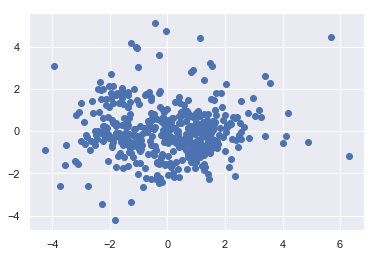

In [134]:
#次元削減後のデータ可視化
plt.scatter(data_pca[:, 0], data_pca[:, 1])

[0.44237417 0.71894523 0.83511865 0.93129585 0.97705265 1.        ]


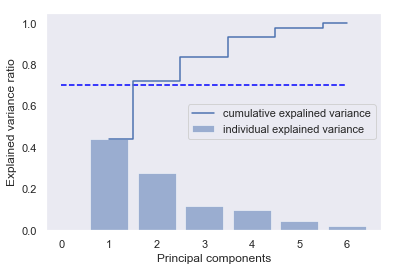

In [135]:
#PCAの分散説明率を表示するコードサンプル
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data_log)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

In [136]:
skm=ScratchKMeans(4,5,10,0)
skm.fit(data_pca)
pred=skm.predict(data_pca)

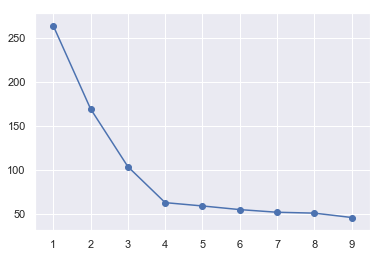

In [137]:
## 【問題10】クラスタ数kの選択
SSE=[]
for i in range(1,10):
    el=ScratchKMeans(i,5,10,0)
    el.fit(X)
    SSE.append(el.SSE_n_init.min())
plt.plot(range(1,10),SSE)
plt.scatter(range(1,10),SSE)
plt.show()

エルボー法より、クラス数４からSSEの減少率が低下しているため、クラス数４が適切だと判断し分析を行う。

## 【問題11】既知のグループとの比較

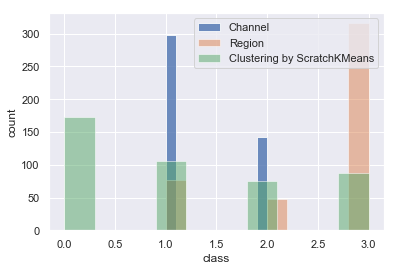

In [138]:
plt.hist(data["Channel"],alpha=0.8, label="Channel")
plt.hist(data["Region"],alpha=0.5,label="Region")
plt.hist(pred,alpha=0.5,label="Clustering by ScratchKMeans")
plt.xlabel("class")
plt.ylabel("count")
plt.legend()
plt.show()

Chanel,Region,Clustering by ScratchKMeans(以降SKM)のラベル２のグループが類似している

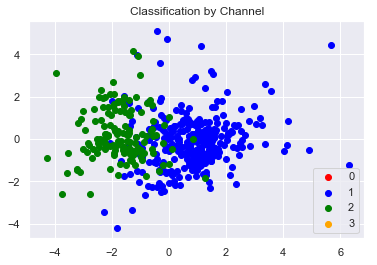

In [139]:
c=["red","blue","green","orange"]
for i in range(4):
    plt.scatter(data_pca[data["Channel"]==i,0],data_pca[data["Channel"]==i,1],c=c[i],label=i)
plt.legend()
plt.title("Classification by Channel");

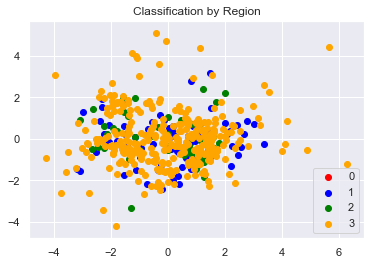

In [140]:
for i in range(4):
    plt.scatter(data_pca[data["Region"]==i,0],data_pca[data["Region"]==i,1],c=c[i],label=i)
plt.legend()
plt.title("Classification by Region");

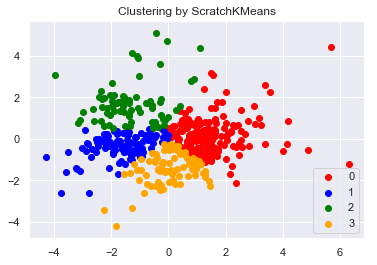

In [141]:
for i in range(4):
    plt.scatter(data_pca[pred==i,0],data_pca[pred==i,1],c=c[i],label=i)
plt.legend()
plt.title("Clustering by ScratchKMeans");

Chanel,SKMによるクラスタリングを比較することにより発見があるかも

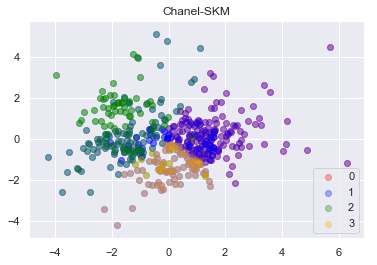

In [142]:
#ChanelとSKMを重ねて表示
for i in range(4):
    plt.scatter(data_pca[data["Channel"]==i,0],data_pca[data["Channel"]==i,1],c=c[i],alpha=0.3)
    plt.scatter(data_pca[pred==i,0],data_pca[pred==i,1],c=c[i],alpha=0.3,label=i)
plt.legend()
plt.title("Chanel-SKM")    ;

In [143]:
data2=data.copy()
data2["SKMclass"]=pred

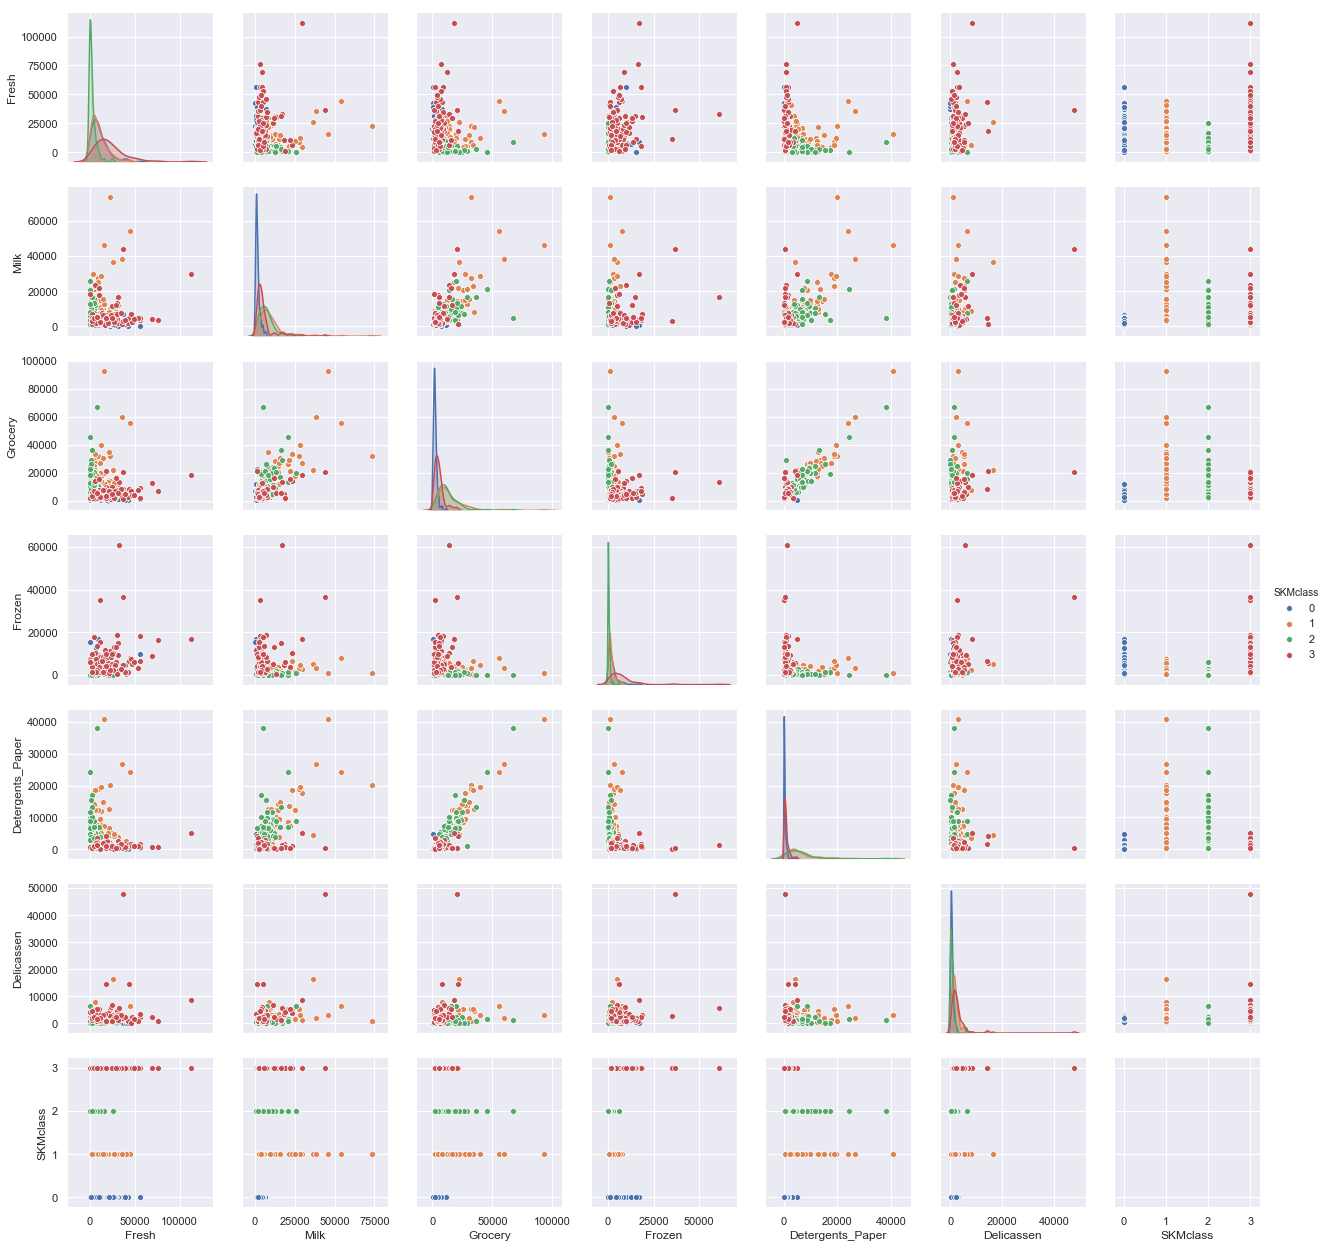

In [150]:
#SKMclassのペアプロット
sns.pairplot(data2.drop(columns=["Channel","Region"]), hue='SKMclass');

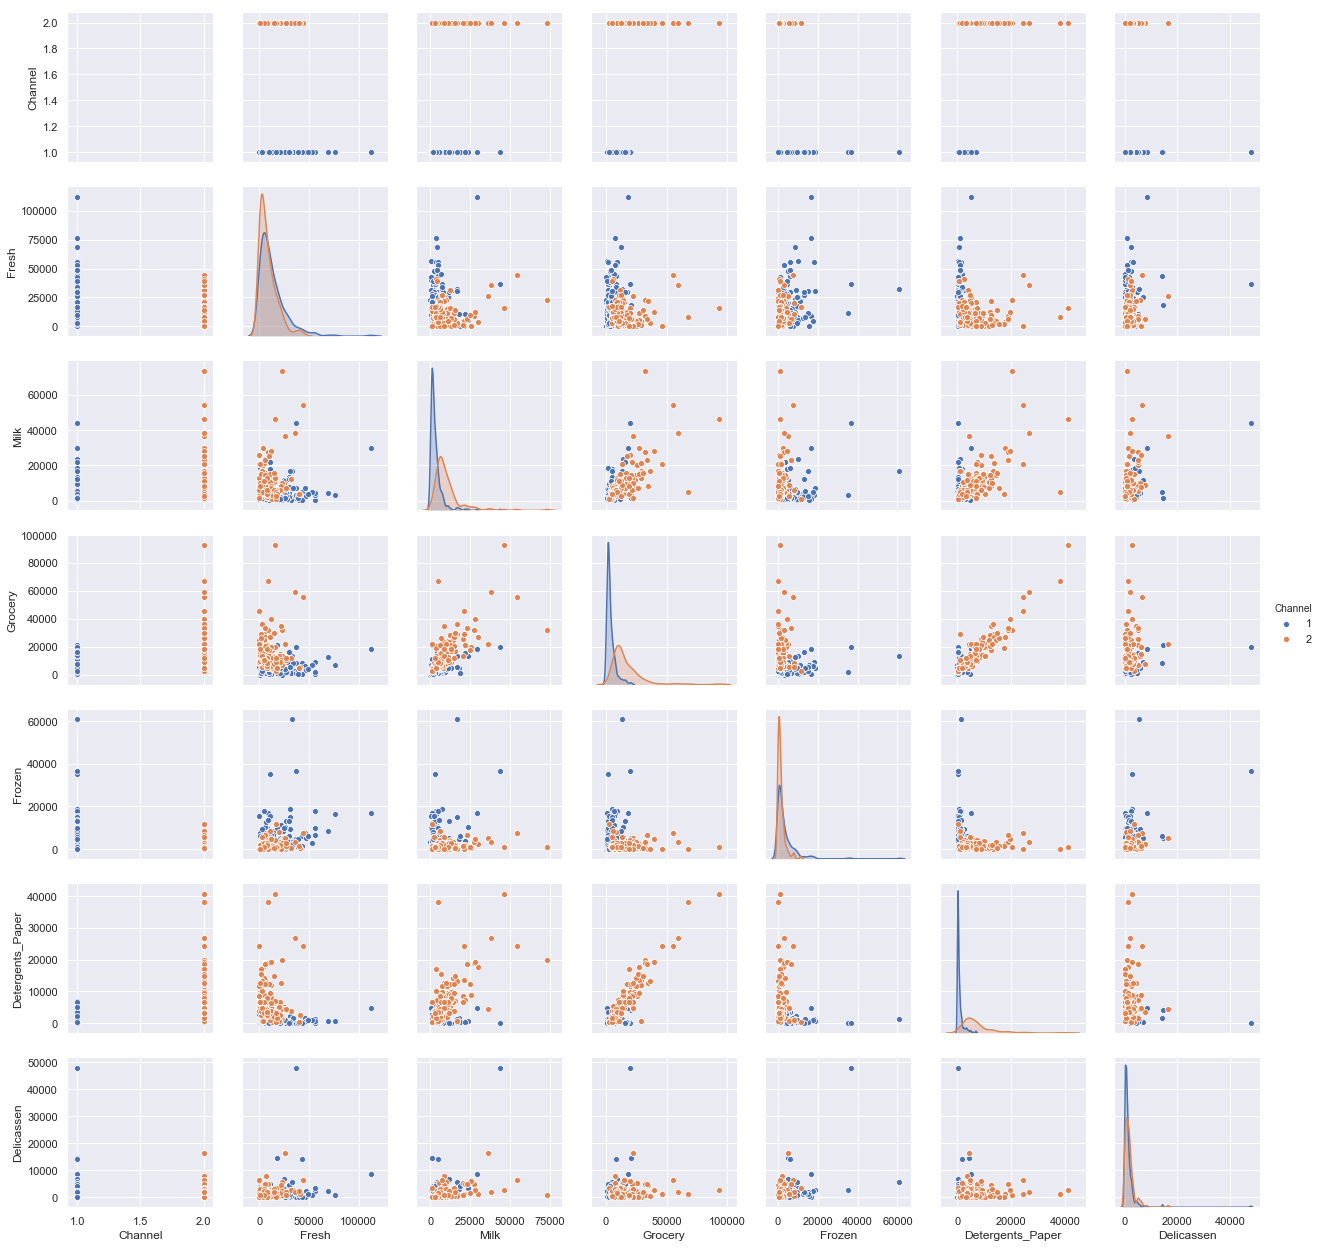

In [151]:
#Channelのペアプロット
sns.pairplot(data2.drop(columns=["Region","SKMclass"]), hue='Channel');

## 【問題12】卸売業者にとって有益な情報

In [108]:
data2.groupby(["Channel","Region","SKMclass"]).sum().round()

Fresh    Milk  Grocery  Frozen  Detergents_Paper  \
Channel Region SKMclass                                                       
1       1      0          372651   61572    73449   77550             17834   
               1           56942   51105    64967    8177             19924   
               2            8712   27190    23655    2775              5885   
               3          322928   88475    75471   96010             12438   
        2      0          192578   30639    76505   74612              8654   
               2            1182    3088     6114     978               821   
               3          132455   30792    40455   85271              4041   
        3      0         1371405  206219   246266  280191             41657   
               1          110674   74492    98887   24574             21027   
               2           78693  105371   155918   12365             53937   
               3         1367497  349671   319030  454476             49369   
2       1      1           67043  122661   199514   26012             92756   
               2           12695   62935   122101    6569             53556   
               3           13862    8516    10880   13933              1743   
        2      1           91303   99723   124548   10344             54438   
               2           30380   73974   182909    7368            105025   
               3           16823     928     2743   11559               332   
        3      0           13146    1124     4523    1420               549   
               1          791816  840873  1130331  125691            496025   
               2           93930  279220   497331   13589            217840   
               3          133416   31789    42965   18186             10006   

                         Delicassen  
Channel Region SKMclass              
1       1      0              22258  
               1              10658  
               2               1581  
               3              36135  
        2      0              13462  
               2               1637  
               3              15866  
        3      0              82415  
               1              23453  
               2              11079  
               3             203411  
2       1      1              17482  
               2              12716  
               3               3497  
        2      1              14231  
               2               5824  
               3               3486  
        3      0                497  
               1             148071  
               2              26698  
               3              16486

In [109]:
data2.groupby(["Channel","Region","SKMclass"]).mean().round()

Fresh     Milk  Grocery   Frozen  Detergents_Paper  \
Channel Region SKMclass                                                         
1       1      0         10960.0   1811.0   2160.0   2281.0             525.0   
               1          8135.0   7301.0   9281.0   1168.0            2846.0   
               2          2178.0   6798.0   5914.0    694.0            1471.0   
               3         23066.0   6320.0   5391.0   6858.0             888.0   
        2      0          9629.0   1532.0   3825.0   3731.0             433.0   
               2          1182.0   3088.0   6114.0    978.0             821.0   
               3         18922.0   4399.0   5779.0  12182.0             577.0   
        3      0         11622.0   1748.0   2087.0   2374.0             353.0   
               1          7905.0   5321.0   7063.0   1755.0            1502.0   
               2          3577.0   4790.0   7087.0    562.0            2452.0   
               3         23991.0   6135.0   5597.0   7973.0             866.0   
2       1      1          7449.0  13629.0  22168.0   2890.0           10306.0   
               2          1814.0   8991.0  17443.0    938.0            7651.0   
               3          6931.0   4258.0   5440.0   6966.0             872.0   
        2      1         10145.0  11080.0  13839.0   1149.0            6049.0   
               2          3376.0   8219.0  20323.0    819.0           11669.0   
               3         16823.0    928.0   2743.0  11559.0             332.0   
        3      0         13146.0   1124.0   4523.0   1420.0             549.0   
               1         11997.0  12740.0  17126.0   1904.0            7516.0   
               2          2935.0   8726.0  15542.0    425.0            6808.0   
               3         22236.0   5298.0   7161.0   3031.0            1668.0   

                         Delicassen  
Channel Region SKMclass              
1       1      0              655.0  
               1             1523.0  
               2              395.0  
               3             2581.0  
        2      0              673.0  
               2             1637.0  
               3             2267.0  
        3      0              698.0  
               1             1675.0  
               2              504.0  
               3             3569.0  
2       1      1             1942.0  
               2             1817.0  
               3             1748.0  
        2      1             1581.0  
               2              647.0  
               3             3486.0  
        3      0              497.0  
               1             2244.0  
               2              834.0  
               3             2748.0

In [ ]:
comb=
for i in range(data2.shape[1]):
    
    plt.bar(data2)

In [ ]:
import itertools
combinations = list(itertools.combinations(df.columns[:4], 2)) # 組み合わせの取得
fig, axes = plt.subplots(6, figsize=(5,30)) # subplotsを使うと複数のグラフをまとめられる
for i, comb in enumerate(combinations):
    axes[i].set_title(comb[0]+' and '+comb[1])
    axes[i].set(xlabel=comb[0]+'[cm]', ylabel=comb[1]+'[cm]')
    axes[i].scatter(df[df['Species']==0][comb[0]], df[df['Species']==0][comb[1]], c = 'red', label=load_iris().target_names[0])
    axes[i].scatter(df[df['Species']==1][comb[0]], df[df['Species']==1][comb[1]], c = 'blue', label=load_iris().target_names[1])
    axes[i].scatter(df[df['Species']==2][comb[0]], df[df['Species']==2][comb[1]], c = 'green', label=load_iris().target_names[2])
    axes[i].legend()
plt.show()